In [ ]:
'''
we'll be using the CelebA dataset of faces here.
get it from kaggle.

now the dataset has many 80 x 80 pictures of faces.
we want only the faces from these pictures so we'll extract the faces
and the extracted data we basically want as an array of pixel data
and numpy will help us keep this data in a single file
'''

"\nwe'll be using the CelebA dataset of faces here.\nget it from kaggle.\n"

In [ ]:
from PIL import Image
from numpy import asarray

'''
the PIL (now pillow) will help us load the images and convert them to rgb and
then we'll convert them to get the values for the pixels and put them in an array.
'''

def load_image(filename):
    image = Image.open(filename)
    image = image.convert('RGB')
    pixel_data = asarray(image)
    return pixel_data

In [ ]:
'''
since we have many pictures, we'll need to load multiple of them as arrays

the os library has the listdir() which makes a list out of objects in a directory
we can iterate over them to get all the images
we'll set the number of faces as an argument
'''
from os import listdir

def load_faces(directory, n_faces):
    faces = []

    for filename in listdir(directory):

        pixels = load_image(directory + filename)
        faces.append(pixels)

        if (len(faces) == n_faces):
            break

    return asarray(faces)

In [ ]:
listdir("drive/MyDrive") # trying to see what works how

['Psiphon Pro The Internet Freedom VPN_v258_apkpure.com.apk',
 'Classroom',
 'Copy of OOPS in Java.gdoc',
 'Copy of Java Lecture 5.gdoc',
 'Copy of DSA by Shradha Didi & Aman Bhaiya.gsheet',
 'GCamera.apk',
 'cn.wps.xiaomi.abroad.lite_2.1-210_minAPI21(armeabi-v7a)(nodpi)_apkmirror.com.apk',
 'JavaP.rar',
 'Haider Haider RE.mp3',
 'Data.xlsx',
 'Spotify.apk',
 'Maths Lectures',
 'Colab Notebooks',
 'CatvsDog',
 'Wallpapers',
 'Work',
 'Resume (1).gdoc',
 'Resume (1).pdf',
 'Resume.pdf',
 'Resume.gdoc',
 'Untitled document (2).gdoc',
 'Untitled document (1).gdoc',
 'BTech',
 'OS Lab.pdf',
 'OS Lab.gdoc',
 'Python Lab - 5036.gdoc',
 'OS .gdoc',
 'vcards_20231022_110659.vcf',
 'Untitled document.gdoc',
 'Ppt',
 'IMG_20231221_002057_695.jpg',
 'Flash Essentials',
 'Archive',
 'Untitled spreadsheet.gsheet']

In [ ]:
'''
loading 100 pictures from the Faces folder
'''

faces = "drive/MyDrive/Colab Notebooks/GANs/Faces/"
pixels = load_faces(faces, 100)
print(pixels.shape)

(100, 218, 178, 3)


In [ ]:
'''
lets plot these pictures
'''
import matplotlib.pyplot as plt

def plot_faces(faces, n):
    for i in range(n * n):
        plt.subplot(n, n, i+1)
        plt.axis('off')
        plt.imshow(faces[i])
    plt.show()

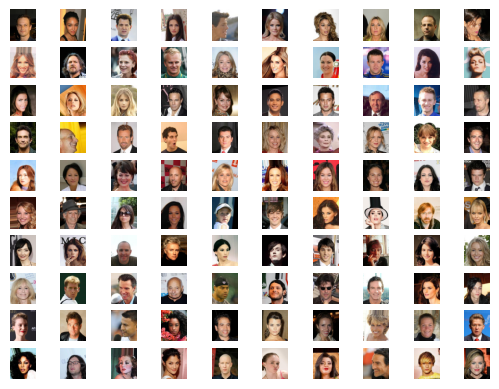

In [ ]:
plot_faces(pixels, 10)  # lets have a look at our CELEBS!!!! -- idk a single one of them

In [ ]:
'''to extract faces, we'll be using mtcnn'''
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.3 MB/s eta 0:00:00


In [ ]:
'''
check the docs online
'''
import mtcnn
print(mtcnn.__version__)

0.1.0


In [ ]:
'''
we'll import the MTCNN model from mtcnn (wow -_-)

but it takes just one image and gives out a n images of a face it detects.

we'll build a function to get this done every photo in our folder.
'''

from mtcnn.mtcnn import MTCNN

model = MTCNN()

In [ ]:
'''

'''

def extract_face(model, pixels, size = (80, 80)):
    faces = model.detect_faces(pixels)

    if len(faces) == 0:
        return None

    x1, y1, width, height = faces[0]['box']

    x1 = abs(x1)
    y1 = abs(y1)

    x2 = x1 + width
    y2 = y1 + height

    face_pixels = pixels[y1 : y2, x1 : x2]

    image = Image.fromarray(face_pixels)
    image = image.resize(size)
    face_array = asarray(image)
    return face_array

In [ ]:
'''
re define the load_faces() to get us only the face from the photo
'''

def load_faces(directory, n_faces):
    model = MTCNN()
    faces = list()

    for filename in listdir(directory):
        pixels = load_image(directory + filename)

        face = extract_face(model, pixels)
        if face is None:
            continue

        faces.append(face)
        print(len(faces), face.shape)

        if len(faces) == n_faces:
            break
    return asarray(faces)

In [ ]:
'''
now we gon test out if the above works
and also save the result i.e, the faces,
in a compressed file using savez_compressed() from numpy
it saves the files as .npz (check docs)
'''

from numpy import savez_compressed

dir = "drive/MyDrive/Colab Notebooks/GANs/Faces/"

faces = load_faces(dir, 100)
print('Loaded : ', faces.shape)
savez_compressed('img_align_celeba.npz', faces)

In [ ]:
'''
the saved data can be loaded using load() from numpy
'''

from numpy import load

data = load('img_align_celeba.npz')

faces = data['arr_0']
print('Loaded: ', faces.shape)

Loaded:  (100, 80, 80, 3)


In [ ]:
'''
in order to load all the images (or maybe some 50000) instead of just 100 (as above)

one might want to just use the local jupyter notebook and use the downloaded images data
instead of uploading to Gdrive because that's just not convenient for a huge number of picture

and once one does have the .npz one doesnt really need the images themselves

indeed thats what i did
'''